<h1>Table of contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-loading-and-inspection" data-toc-modified-id="Data-loading-and-inspection-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data loading and inspection</a></span><ul class="toc-item"><li><span><a href="#Data-file-loading" data-toc-modified-id="Data-file-loading-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data file loading</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Data-preparation-and-processing" data-toc-modified-id="Data-preparation-and-processing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data preparation and processing</a></span><ul class="toc-item"><li><span><a href="#Duplicates-handling" data-toc-modified-id="Duplicates-handling-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Duplicates handling</a></span></li><li><span><a href="#Missing-values-and-data-errors-handling" data-toc-modified-id="Missing-values-and-data-errors-handling-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Missing values and data errors handling</a></span></li><li><span><a href="#Data-types-convertion" data-toc-modified-id="Data-types-convertion-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Data types convertion</a></span></li><li><span><a href="#New-features-calculation" data-toc-modified-id="New-features-calculation-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>New features calculation</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Exploratory-data-analysis" data-toc-modified-id="Exploratory-data-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory data analysis</a></span><ul class="toc-item"><li><span><a href="#User's-behavior-analysis" data-toc-modified-id="User's-behavior-analysis-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>User's behavior analysis</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Hypothesis-testing" data-toc-modified-id="Hypothesis-testing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Hypothesis testing</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Final-conclusion" data-toc-modified-id="Final-conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Final conclusion</a></span></li></ul></div>

# Assessment of the most profitable tariff plan for cellular company

There is the dataset containing data about two tariff plans of cellular company including cellular data, data on SMS and web traffic data.

**Goal**: Assess and define the most profitable tariff plan in terms of revenue and which one should have bigger advertising dollars.

Data analysis will be done based on sample of clients from 2018 containing 500 users of the company and their data regarding how much data in different communication types (cellular, messages, web) they spend;

# Data description

1. Table users (information about users):
    - user_id — user id
    - first_name — user first name
    - last_name — user last name
    - age — age in years
    - reg_date — date of registration
    - churn_date — date of churn (if contains missing value then user used the plan on the moment of data collection)
    - city — user city
    - tariff — user plan
2. Table calls (data about calls):
    - id — call id
    - call_date — call date
    - duration — call duration in minutes
    - user_id — user id
3. Table messages (data about messages):
    - id — message id
    - message_date — message date
    - user_id — user id
4. Table internet (data about web sessions):
    - id — session id
    - mb_used — web traffic used in mb
    - session_date — session date
    - user_id — user id
5. Table tariffs (information about plans):
    - tariff_name — plan name
    - rub_monthly_fee — monthly subscription fee
    - minutes_included — free minutes included in the plan
    - messages_included — free messgaes included in the plan
    - mb_per_month_included — free web traffic amount included in the plan
    - rub_per_minute — price of a minute above free plan in rubles (for example, if plan has 100 free minutes and user spent 101 minutes then user will pay addition fee above the plan)
    - rub_per_message — price of a message above free plan in rubles
    - rub_per_gb — price of a gb above free plan in rubles (1 gb = 1024 mb)



*Comments on tariff plans*:

The cellular company rounds seconds to minutes and mb to gb:
   - each call is rounded separately: even if it lasted 1 second it will be paid as per 1 minute;
   - for web traffic **single sessions are not counted**: instead total monthly amount of web traffic is rounded ahead - if user spent 1025 mb then it will be paid as per 2 gb;

## Data loading and inspection

### Data file loading

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt

pd.set_option('display.max_colwidth', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

try:
    users = pd.read_csv('/datasets/users.csv')
    calls = pd.read_csv('/datasets/calls.csv')
    messages = pd.read_csv('/datasets/messages.csv')
    internet = pd.read_csv('/datasets/internet.csv')
    tariffs = pd.read_csv('/datasets/tariffs.csv')
except:
    users = pd.read_csv('C:/Jupyter_projects/YP/datasets/3/users.csv')
    calls = pd.read_csv('C:/Jupyter_projects/YP/datasets/3/calls.csv')
    messages = pd.read_csv('C:/Jupyter_projects/YP/datasets/3/messages.csv')
    internet = pd.read_csv('C:/Jupyter_projects/YP/datasets/3/internet.csv')
    tariffs = pd.read_csv('C:/Jupyter_projects/YP/datasets/3/tariffs.csv')
    
tables = [('users', users), ('calls', calls), ('messages', messages), ('internet', internet), ('tariffs', tariffs)]

for df in tables:
    print('Table name:', df[0])
    display(df[1].head())

Table name: users


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Table name: calls


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Table name: messages


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Table name: internet


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Table name: tariffs


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


- For each of all the tables show info;

In [2]:
for df in tables:
    print('Table name:', df[0])
    display(df[1].info())

Table name: users
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

Table name: calls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

Table name: messages
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

Table name: internet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

Table name: tariffs
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

In [3]:
users.describe()

,user_id,age
count,500.00,500.00
mean,1249.50,46.59
std,144.48,16.67
min,1000.00,18.00
25%,1124.75,32.00
50%,1249.50,46.00
75%,1374.25,62.00
max,1499.00,75.00


In [4]:
calls.describe()

,duration,user_id
count,202607.00,202607.00
mean,6.76,1253.94
std,5.84,144.72
min,0.00,1000.00
25%,1.30,1126.00
50%,6.00,1260.00
75%,10.70,1379.00
max,38.00,1499.00


In [5]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.00,149396.00,149396.00
mean,74697.50,370.19,1252.10
std,43127.05,278.30,144.05
min,0.00,0.00,1000.00
25%,37348.75,138.19,1130.00
50%,74697.50,348.01,1251.00
75%,112046.25,559.55,1380.00
max,149395.00,1724.83,1499.00


In [6]:
for df in tables:
    print('Table', df[0], ': {}'.format(df[1].shape))

Table users : (500, 8)
Table calls : (202607, 4)
Table messages : (123036, 3)
Table internet : (149396, 5)
Table tariffs : (2, 8)


### Conclusion

1. Data about 500 users is presented in the form of 4 tables of different communication types plus 1 table with plans description;
2. Missing values are detected only in churn_date column of users table;
3. Unrealistic values are detected in duration column of calls table, where there are 0 values:
4. Following columns need to be converted in data types:
    - in users table: churn_date and reg_date to datetime;
    - in calls table: call_date to datetime, duration to int;
    - in messages table: messages_date to datetime;

## Data preparation and processing

### Duplicates handling

- First check full duplicates in each of the tables;

In [7]:
for df in tables:
    display(df[0], df[1].duplicated().sum())

'users'

0

'calls'

0

'messages'

0

'internet'

0

'tariffs'

0

In [8]:
users.columns

Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object')

- Now check different case string duplicates in city column of users table;

In [9]:
print('Number of unique values in city column BEFORE: {}'.format(users['city'].value_counts().count()))
users['city_lower'] = users['city'].str.lower()
print('Number of unique values in city column AFTER: {}'.format(users['city_lower'].value_counts().count()))

Number of unique values in city column BEFORE: 76
Number of unique values in city column AFTER: 76


**Вывод**


- Возможные явные полные и неявные дубликаты не обнаружены;

### Missing values and data errors handling

- The only column, which has missing values is churn_date in users table. In comments to the data it says that missing values mean that the user was using the plan on the moment of data collection;
- Lets put a dummy value instead of missing values - 01.01.2099;

In [10]:
print('NaNs in churn_date BEFORE: ', users.churn_date.isna().sum())
users.churn_date.fillna('2099-01-01', inplace=True)
print('NaNs in churn_date AFTER: ', users.churn_date.isna().sum())
display(users.churn_date.value_counts().reset_index().iloc[0:3, :])

NaNs in churn_date BEFORE:  462
NaNs in churn_date AFTER:  0


,index,churn_date
0,2099-01-01,462
1,2018-12-03,2
2,2018-10-03,2


- The only column with data errors looks to be duration column of calls table having 0 values for duration of calls;
- It looks like these calls are missing ones;
- Lets estimate how many zero value there are in the column and how its absence will affect on futher data analysis;

Fraction of 0 in duration column: 19.6%


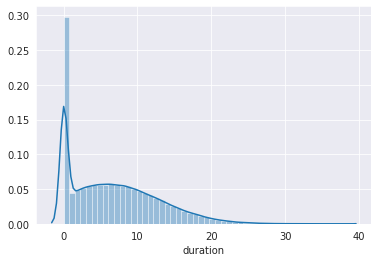

In [11]:
print('Fraction of 0 in duration column: {:.1%}'.format(calls[calls.duration == 0]['duration'].count()/calls.shape[0]))
sns.set_style('darkgrid')
sns.distplot(calls['duration'])
plt.show()

- There is 20% of data in duration columns of calls table, which has 0 values. Presence of 0 in duration column will not affect calculation of revenue, which is one of the most crucial parameter in the anaysis, so lets remain zeros;

### Data types convertion

In [12]:
# updating tables and printing table names with its column names
tables = [('users', users), ('calls', calls), ('messages', messages), ('internet', internet)]
for df in tables:
    print('Table name:', df[0])
    display(df[1].columns)
    display(df[1].shape)
    print()

Table name: users


Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff', 'city_lower'],
      dtype='object')

(500, 9)


Table name: calls


Index(['id', 'call_date', 'duration', 'user_id'], dtype='object')

(202607, 4)


Table name: messages


Index(['id', 'message_date', 'user_id'], dtype='object')

(123036, 3)


Table name: internet


Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object')

(149396, 5)

- Before date data convertion, lets define, which parameters of the date will be used in the analysis. Definetely, month is must have;
- Lets convert the following columns to datetime format: call_date, message_date и session_date;

In [13]:
for df in tables:
    for column in df[1].columns:
        if column[-4:] == 'date':
            df[1][column+'_datetime'] = pd.to_datetime(df[1][column], format='%Y-%m-%d')
            if column in ['call_date', 'message_date', 'session_date']:
                df[1]['month'] = df[1][column+'_datetime'].dt.month
            
for df in tables:
    print('Table name:', df[0])
    display(df[1].info())
    print()

Table name: users
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
user_id                500 non-null int64
age                    500 non-null int64
churn_date             500 non-null object
city                   500 non-null object
first_name             500 non-null object
last_name              500 non-null object
reg_date               500 non-null object
tariff                 500 non-null object
city_lower             500 non-null object
churn_date_datetime    500 non-null datetime64[ns]
reg_date_datetime      500 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 43.1+ KB


None


Table name: calls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 6 columns):
id                    202607 non-null object
call_date             202607 non-null object
duration              202607 non-null float64
user_id               202607 non-null int64
call_date_datetime    202607 non-null datetime64[ns]
month                 202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 9.3+ MB


None


Table name: messages
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 5 columns):
id                       123036 non-null object
message_date             123036 non-null object
user_id                  123036 non-null int64
message_date_datetime    123036 non-null datetime64[ns]
month                    123036 non-null int64
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 4.7+ MB


None


Table name: internet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 7 columns):
Unnamed: 0               149396 non-null int64
id                       149396 non-null object
mb_used                  149396 non-null float64
session_date             149396 non-null object
user_id                  149396 non-null int64
session_date_datetime    149396 non-null datetime64[ns]
month                    149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 8.0+ MB


None

- Converting duration column of calls table to int rounding ahead;
- To check how well the convertion is performed lets create a column where duration values with a decimal part will be assigned as True and without decimal part as False;

In [14]:
calls['duration_decimal_flag'] = calls['duration'].apply(lambda x: x%1) > 0
display(calls['duration_decimal_flag'].value_counts())
calls[calls['duration_decimal_flag'] == True].sample(10)

True     161447
False     41160
Name: duration_decimal_flag, dtype: int64

,id,call_date,duration,user_id,call_date_datetime,month,duration_decimal_flag
191508,1471_311,2018-05-26,3.72,1471,2018-05-26,5,True
28148,1070_23,2018-12-05,0.57,1070,2018-12-05,12,True
125236,1322_59,2018-10-03,7.07,1322,2018-10-03,10,True
123236,1318_235,2018-07-03,14.92,1318,2018-07-03,7,True
150156,1377_1003,2018-10-09,0.36,1377,2018-10-09,10,True
131673,1339_2,2018-10-09,7.68,1339,2018-10-09,10,True
156212,1385_291,2018-01-31,3.99,1385,2018-01-31,1,True
174485,1431_174,2018-12-17,8.87,1431,2018-12-17,12,True
59875,1150_185,2018-12-07,7.69,1150,2018-12-07,12,True
104720,1268_282,2018-06-20,0.86,1268,2018-06-20,6,True


In [15]:
# rounding duration ahead, conveting to int and checking results
calls['duration_ceiled'] = np.ceil(calls['duration']).astype(int)
calls[calls['duration_decimal_flag'] == True].sample(10)

,id,call_date,duration,user_id,call_date_datetime,month,duration_decimal_flag,duration_ceiled
29623,1075_29,2018-11-02,8.39,1075,2018-11-02,11,True,9
183648,1456_120,2018-12-30,6.34,1456,2018-12-30,12,True,7
169010,1416_177,2018-10-10,15.41,1416,2018-10-10,10,True,16
150513,1377_1360,2018-04-09,0.37,1377,2018-04-09,4,True,1
91985,1228_397,2018-11-10,5.37,1228,2018-11-10,11,True,6
133839,1341_1069,2018-12-02,7.25,1341,2018-12-02,12,True,8
186300,1460_218,2018-09-01,9.03,1460,2018-09-01,9,True,10
38678,1097_10,2018-11-08,15.25,1097,2018-11-08,11,True,16
120370,1310_565,2018-07-11,8.25,1310,2018-07-11,7,True,9
21013,1055_506,2018-11-16,5.10,1055,2018-11-16,11,True,6


**Conclusion**

- Date data is converted to datetime format;
- Duration values of calls table are rounded ahead;

### New features calculation

 - For purposes of the further data analysis lets calculate the following new parameters:
     - number of calls and amount of minutes spent per month;
     - number of messages spent per month;
     - amount of used web traffic per month;
     - after calculation of monthly web traffic, which is a sum of web traffic of all the sessions in the month, total value is rounded from mb to gb;
     - monthly revenue from each of users;
 - Lets create pivot tables on data from different communication types and calculate desired parameters;

In [16]:
user_calls_monthly = calls.pivot_table(index=['user_id', 'month'], 
                                       values='duration_ceiled', 
                                       aggfunc=['count', 'sum']
                                      )
user_calls_monthly.columns = ['call_duration_ceiled_count', 'call_duration_ceiled_sum']
user_calls_monthly.loc[(1000, slice(None)), :]

call_duration_ceiled_count  call_duration_ceiled_sum
user_id month                                                      
1000    5                              22                       159
        6                              43                       172
        7                              47                       340
        8                              52                       408
        9                              58                       466
        10                             57                       350
        11                             43                       338
        12                             46                       333

In [17]:
user_messages_monthly = messages.pivot_table(index=['user_id', 'month'], 
                                             values='id', 
                                             aggfunc='count'
                                            )
user_messages_monthly.columns = ['message_count']
user_messages_monthly.loc[(1000, slice(None)), :]

message_count
user_id month               
1000    5                 22
        6                 60
        7                 75
        8                 81
        9                 57
        10                73
        11                58
        12                70

In [18]:
user_internet_monthly = internet.pivot_table(index=['user_id', 'month'], 
                                          values='mb_used', 
                                          aggfunc='sum'
                                         )
user_internet_monthly.columns = ['mb_used']

# rounding mb to gb
user_internet_monthly['mb_used_ceiled'] = user_internet_monthly['mb_used'].apply(lambda x: int(np.ceil(x/1000)*1000))
mi_copy = user_internet_monthly.copy(deep=True)

display(user_internet_monthly.loc[(1000, slice(None)), :])

user_internet_monthly.drop(columns='mb_used', inplace=True)

mb_used  mb_used_ceiled
user_id month                         
1000    5      2253.49            3000
        6     23233.77           24000
        7     14003.64           15000
        8     14055.93           15000
        9     14568.91           15000
        10    14702.49           15000
        11    14756.47           15000
        12     9817.61           10000

- Pivot tables are ready. Now lets merge them in one;

In [19]:
display(user_calls_monthly.shape)
display(user_messages_monthly.shape)
user_internet_monthly.shape

(3174, 2)

(2717, 1)

(3203, 1)

- All the pivot tables have different size so it needs to merge them using outer join;

In [20]:
user_data_monthly = user_calls_monthly.merge(user_messages_monthly, 
                                             on=['user_id', 'month'], 
                                             how='outer'
                                            )\
                                      .merge(user_internet_monthly, 
                                             on=['user_id', 'month'], 
                                             how='outer'
                                            )
display(user_data_monthly.loc[(1000, slice(None)), :])
user_data_monthly.shape
user_data_monthly.isna().sum()

call_duration_ceiled_count  call_duration_ceiled_sum  \
user_id month                                                         
1000    5                           22.00                    159.00   
        6                           43.00                    172.00   
        7                           47.00                    340.00   
        8                           52.00                    408.00   
        9                           58.00                    466.00   
        10                          57.00                    350.00   
        11                          43.00                    338.00   
        12                          46.00                    333.00   

               message_count  mb_used_ceiled  
user_id month                                 
1000    5              22.00         3000.00  
        6              60.00        24000.00  
        7              75.00        15000.00  
        8              81.00        15000.00  
        9              57.00        15000.00  
        10             73.00        15000.00  
        11             58.00        15000.00  
        12             70.00        10000.00

call_duration_ceiled_count     40
call_duration_ceiled_sum       40
message_count                 497
mb_used_ceiled                 11
dtype: int64

- There are users who didn't use messages and calls, but used web traffic and so on, there are different users who used different combinations of communication types, that is why there are missing values after merging;
- Filling missing values with 0;

In [21]:
display(user_data_monthly.isna().sum())
user_data_monthly.fillna(0, inplace=True)
display(user_data_monthly.isna().sum())
display(user_data_monthly[user_data_monthly['message_count'] == 0]['message_count'].count())
display(user_data_monthly.loc[(1000, slice(None)), :])

call_duration_ceiled_count     40
call_duration_ceiled_sum       40
message_count                 497
mb_used_ceiled                 11
dtype: int64

call_duration_ceiled_count    0
call_duration_ceiled_sum      0
message_count                 0
mb_used_ceiled                0
dtype: int64

497

call_duration_ceiled_count  call_duration_ceiled_sum  \
user_id month                                                         
1000    5                           22.00                    159.00   
        6                           43.00                    172.00   
        7                           47.00                    340.00   
        8                           52.00                    408.00   
        9                           58.00                    466.00   
        10                          57.00                    350.00   
        11                          43.00                    338.00   
        12                          46.00                    333.00   

               message_count  mb_used_ceiled  
user_id month                                 
1000    5              22.00         3000.00  
        6              60.00        24000.00  
        7              75.00        15000.00  
        8              81.00        15000.00  
        9              57.00        15000.00  
        10             73.00        15000.00  
        11             58.00        15000.00  
        12             70.00        10000.00

- Lets add tariff column to the summary table in order to calculate revenue;

In [22]:
user_data_monthly.shape

(3214, 4)

In [23]:
# reset index to keep month column
user_data_monthly.reset_index(inplace=True)
display(user_data_monthly.shape)
user_data_monthly.head()

(3214, 6)

,user_id,month,call_duration_ceiled_count,call_duration_ceiled_sum,message_count,mb_used_ceiled
0,1000,5,22.00,159.00,22.00,3000.00
1,1000,6,43.00,172.00,60.00,24000.00
2,1000,7,47.00,340.00,75.00,15000.00
3,1000,8,52.00,408.00,81.00,15000.00
4,1000,9,58.00,466.00,57.00,15000.00


In [24]:
user_data_monthly = user_data_monthly.merge(users[['user_id', 'tariff']], on='user_id')
display(user_data_monthly.shape)
user_data_monthly.head()

(3214, 7)

,user_id,month,call_duration_ceiled_count,call_duration_ceiled_sum,message_count,mb_used_ceiled,tariff
0,1000,5,22.00,159.00,22.00,3000.00,ultra
1,1000,6,43.00,172.00,60.00,24000.00,ultra
2,1000,7,47.00,340.00,75.00,15000.00,ultra
3,1000,8,52.00,408.00,81.00,15000.00,ultra
4,1000,9,58.00,466.00,57.00,15000.00,ultra


- Final table is ready for revenue calculation, lets create special function for it;

In [25]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [26]:
def revenue_per_user_monthly(row):
    """
    calculates monthly revenue per each user, uses data from tariffs table
    
    params:
    - row - row of the dataframa
    
    returns:
    - revenue value
    """
    if row['tariff'] == 'ultra':
        fil = tariffs['tariff_name'] == 'ultra'
        
        # calculating amounts above plan
        calls_diff = row['call_duration_ceiled_sum']-tariffs[fil]['minutes_included'].values[0]
        message_diff = row['message_count']-tariffs[fil]['messages_included'].values[0]
        internet_diff = row['mb_used_ceiled']-tariffs[fil]['mb_per_month_included'].values[0]
        
        # if difference < 0 then assign 0
        if calls_diff < 0:
            calls_diff = 0
        if message_diff < 0:
            message_diff = 0
        if internet_diff < 0:
            internet_diff = 0
        return calls_diff + message_diff + (internet_diff/1000)*tariffs[fil]['rub_per_gb'].values[0] + tariffs[fil]['rub_monthly_fee'].values[0]
    else:
        fil = tariffs['tariff_name'] == 'smart'
        calls_diff = row['call_duration_ceiled_sum']-tariffs[fil]['minutes_included'].values[0]
        message_diff = row['message_count']-tariffs[fil]['messages_included'].values[0]
        internet_diff = row['mb_used_ceiled']-tariffs[fil]['mb_per_month_included'].values[0]
        if calls_diff < 0:
            calls_diff = 0
        if message_diff < 0:
            message_diff = 0
        if internet_diff < 0:
            internet_diff = 0
        return calls_diff*tariffs[fil]['rub_per_minute'].values[0] + message_diff*tariffs[fil]['rub_per_message'].values[0] + (internet_diff/1024)*tariffs[fil]['rub_per_gb'].values[0] + tariffs[fil]['rub_monthly_fee'].values[0]

In [27]:
user_data_monthly['revenue'] = user_data_monthly.apply(revenue_per_user_monthly, axis=1)
user_data_monthly[user_data_monthly['user_id'] == 1000]

,user_id,month,call_duration_ceiled_count,call_duration_ceiled_sum,message_count,mb_used_ceiled,tariff,revenue
0,1000,5,22.00,159.00,22.00,3000.00,ultra,1950.00
1,1000,6,43.00,172.00,60.00,24000.00,ultra,1950.00
2,1000,7,47.00,340.00,75.00,15000.00,ultra,1950.00
3,1000,8,52.00,408.00,81.00,15000.00,ultra,1950.00
4,1000,9,58.00,466.00,57.00,15000.00,ultra,1950.00
5,1000,10,57.00,350.00,73.00,15000.00,ultra,1950.00
6,1000,11,43.00,338.00,58.00,15000.00,ultra,1950.00
7,1000,12,46.00,333.00,70.00,10000.00,ultra,1950.00


### Conclusion

- Data is prepared for data analysis:
    - Duplicates handling is done;
    - Missing values and data errors handling is done;
    - Data types conversion is done;
    - New features calculation is done;

## Exploratory data analysis

### User's behavior analysis

- Describing user's behavior:
    - Lets estimate number of spent minutes of calls, number of spent messages and used web traffic calculating mean, variance and standart deviation and plotting results, describing distributions;

- Dividing the summary table onto two dataframes based on plan;

In [28]:
user_data_monthly['tariff'].value_counts()

smart    2229
ultra     985
Name: tariff, dtype: int64

In [29]:
smart = user_data_monthly[user_data_monthly['tariff'] == 'smart']
ultra = user_data_monthly[user_data_monthly['tariff'] == 'ultra']

display(smart.shape[0])
ultra.shape[0]

2229

985

- Lets calculate statistics for different plans and plot it with histograms;

In [30]:
# smart
# means
mean_smart_calls_duration = smart['call_duration_ceiled_sum'].mean()
mean_smart_messages_count = smart['message_count'].mean()
mean_smart_mb_used = smart['mb_used_ceiled'].mean()

# vars
var_smart_calls_duration = np.var(smart['call_duration_ceiled_sum'], ddof=1)
var_smart_messages_count = np.var(smart['message_count'], ddof=1)
var_smart_mb_used = np.var(smart['mb_used_ceiled'], ddof=1)

# std
std_smart_calls_duration = np.sqrt(var_smart_calls_duration)
std_smart_messages_count = np.sqrt(var_smart_messages_count)
std_smart_mb_used = np.sqrt(var_smart_mb_used)

In [31]:
# ultra
# means
mean_ultra_calls_duration = ultra['call_duration_ceiled_sum'].mean()
mean_ultra_messages_count = ultra['message_count'].mean()
mean_ultra_mb_used = ultra['mb_used_ceiled'].mean()

# vars
var_ultra_calls_duration = np.var(ultra['call_duration_ceiled_sum'], ddof=1)
var_ultra_messages_count = np.var(ultra['message_count'], ddof=1)
var_ultra_mb_used = np.var(ultra['mb_used_ceiled'], ddof=1)

# std
std_ultra_calls_duration = np.sqrt(var_ultra_calls_duration)
std_ultra_messages_count = np.sqrt(var_ultra_messages_count)
std_ultra_mb_used = np.sqrt(var_ultra_mb_used)

- Creating functions:
    - For calculation optimal parameters of annotation coorinates in histograms;
    - For plotting all the data;

In [32]:
def text_parameters(column, bins, den=True):
    """
    calculates optimal parameters for annotaion coordinates in histograms
    
    params:
    - column - data for histograms;
    - bins - number of bins;
    - den - True if density histogram is needed, False if counts are needed;
    
    returns:
    - y_text - max value of density/counts;
    - binwidth - bin width;
    - countwidth - count width;
    - x_max - max value of x axis;
    - x_min - min value of x axis;
    
    """
    # extract parameters of axes matplotlib object
    counts, bins, bars = plt.hist(column, 
                                  bins=bins, 
                                  density=den
                                 )
    count_bin_list = list(zip(list(counts), list(bins)[1:]))
    
    # calculate optimal parameters
    x_max = plt.xticks()[0].max()
    x_min = plt.xticks()[0].min()
    y_text = max(count_bin_list, key=lambda x: x[0])[0]
    binwidth = (max(list(bins)) - min(list(bins)))/len(bins)
    countwidth = (max(list(counts)) - min(list(counts)))/len(counts)
    
    # close axes objects
    plt.close()
    
    return y_text, binwidth, countwidth, x_max, x_min

In [33]:
def hist_plot(column_smart, column_ultra, 
              mean_1, var_1, std_1, 
              mean_2, var_2, std_2, 
              bins, 
              text_params_1, text_params_2,
              s_lim=0, u_lim=0, 
              limits=False, den=True
             ):
    """
    plots histogram of a parameter of two datasets with statistics and additional vertical lines
    
    params:
    - column_smart, column_ultra - data for the histogram;
    - mean_1, mean_2 - means of the data;
    - var_1, var_2 - variances of the data;
    - std_1, std_2 - standart deviations of the data;
    - bins - number of bins;
    - text_params_1, text_params_2 - text_parameters() return values for two datasets;
    - s_lim, u_lim - values for additional vertical lines, both equal 0 by default, because limits=False by default;
    - limits - True for plotting additional vertical lines, False by default;
    - den - True for density, False for counts;
    """
    # unzip text_params
    y_text_1, binwidth, countwidth, x_max_1, x_min_1 = text_params_1
    y_text_2, _, _, x_max_2, x_min_2 = text_params_2
    x_max = max([x_max_1, x_max_2])
    x_min = min([x_min_1, x_min_2])
    
    # create histogram title
    title_name = ' '.join([i.capitalize() if index == 0 else i for index, i in enumerate(column_smart.name.split('_'))])
    legend_smart = 'Smart'
    legend_ultra = 'Ultra'
    
    # set histogram and its parameters
    sns.set_style('darkgrid')
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.distplot(column_smart, 
                 ax=ax, 
                 bins=bins, 
                 kde=den,
                 kde_kws={'label': legend_smart},
                 label=legend_smart
                ).set(title=title_name)
    sns.distplot(column_ultra, 
                 ax=ax, 
                 bins=bins, 
                 kde=den,
                 kde_kws={'label': legend_ultra},
                 label=legend_ultra
                )
    
    # set statistics and annotation parameters
    plt.axvline(mean_1, color='dodgerblue', linestyle='--', linewidth=2)
    ax.text(mean_1+binwidth, y_text_1, 'Mean {}: {:.1f}'.format(legend_smart, mean_1))
    ax.text(mean_1+3*std_1, y_text_1, 'Variance {}: {:.1f}'.format(legend_smart, var_1))
    ax.text(mean_1+3*std_1, y_text_1-countwidth, 'Std {}: {:.1f}'.format(legend_smart, std_1))
    
    plt.axvline(mean_2, color='coral', linestyle='--', linewidth=2)
    ax.text(mean_2+binwidth, y_text_2, 'Mean {}: {:.1f}'.format(legend_ultra, mean_2))
    ax.text(mean_2+3*std_1, y_text_2, 'Variance {}: {:.1f}'.format(legend_ultra, var_2))
    ax.text(mean_2+3*std_1, y_text_2-countwidth, 'Std {}: {:.1f}'.format(legend_ultra, std_2))
    
    # set additional lines and annotation parameters
    if limits:
        if s_lim < 1.5*max([column_smart.max(), column_ultra.max()]):
            plt.axvline(s_lim, color='dodgerblue', linestyle='-', linewidth=1)
            ax.text(s_lim, 0.5*countwidth, 'Smart limit', rotation=270)
        else:
            ax.text(x_max, 0.5*countwidth, '^ Smart limit {}'.format(s_lim), rotation=270)

        if u_lim < 1.5*max([column_smart.max(), column_ultra.max()]):
            plt.axvline(u_lim, color='coral', linestyle='-', linewidth=1)
            ax.text(u_lim, 0.5*countwidth, 'Ultra limit', rotation=270)
        else:
            ax.text(x_max, 0.5*countwidth, '^ Ultra limit {}'.format(u_lim), rotation=270)
    
    plt.show()

- Square root of number of data points is a good approximation for number of bins;

In [34]:
display(np.sqrt(smart.shape[0]))
np.sqrt(ultra.shape[0])

47.21228653645151

31.38470965295043

- Lets choose 30 as a number of bins for better visualization of rounded parameters;

In [35]:
optimal_bins = 30

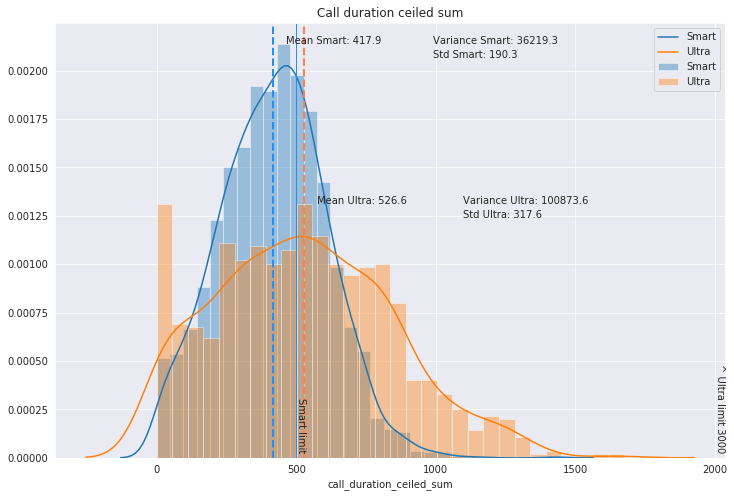

In [36]:
text_params_calls_smart = text_parameters(smart['call_duration_ceiled_sum'],
                optimal_bins
               )
text_params_calls_ultra = text_parameters(ultra['call_duration_ceiled_sum'],
                optimal_bins
               )
hist_plot(smart['call_duration_ceiled_sum'],
          ultra['call_duration_ceiled_sum'],
          mean_smart_calls_duration, 
          var_smart_calls_duration, 
          std_smart_calls_duration,
          mean_ultra_calls_duration, 
          var_ultra_calls_duration, 
          std_ultra_calls_duration,
          optimal_bins,
          text_params_calls_smart,
          text_params_calls_ultra,
          s_lim=500,
          u_lim=3000,
          limits=True
         )

- In average, users of Ultra plan spend approximately 20% more minutes monthly than users of Smart plan;
- At the same time, Ultra users are more diverse in terms of number of minutes spent monthly: its standard deviation almost 1.5 times higher than for Smart users;
- It is important to note that **non of the users** approach even 50% of number of minutes provided by Ultra plan;
- Big amount of Smart users pays above plan for number of minutes spent;

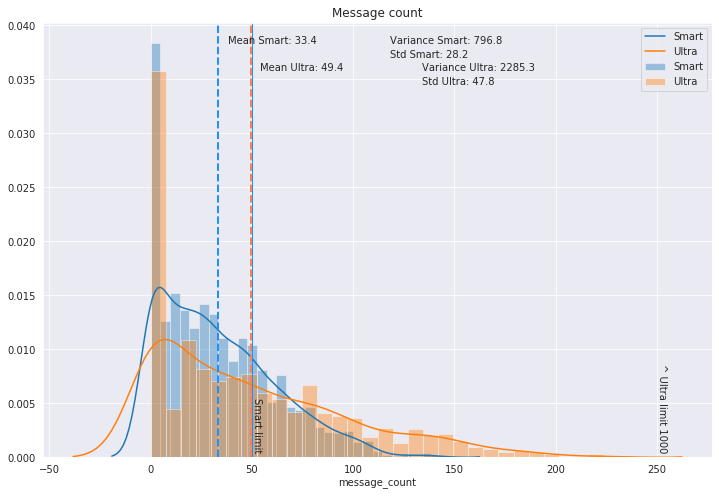

In [37]:
text_params_calls_smart = text_parameters(smart['message_count'],
                optimal_bins
               )
text_params_calls_ultra = text_parameters(ultra['message_count'],
                optimal_bins
               )
hist_plot(smart['message_count'],
          ultra['message_count'],
          mean_smart_messages_count, 
          var_smart_messages_count, 
          std_smart_messages_count,
          mean_ultra_messages_count, 
          var_ultra_messages_count, 
          std_ultra_messages_count,
          optimal_bins,
          text_params_calls_smart,
          text_params_calls_ultra,
          s_lim=50,
          u_lim=1000,
          limits=True
         )

- For both plans majority quite big part of users do not use messages at all;
- In average, approximately 1.5 times more messages are sent by Ultra users with standard deviation almost 2 times higher, which is well shown in histograms, much more Ultra users send more than 100 messages compared to Smart users;
- Here it is similar distribution of data in relation to plan limitations: **no one** approaches to the Ultra message limitation, which equals 1000;
- Big part of Smart users pays above plan;

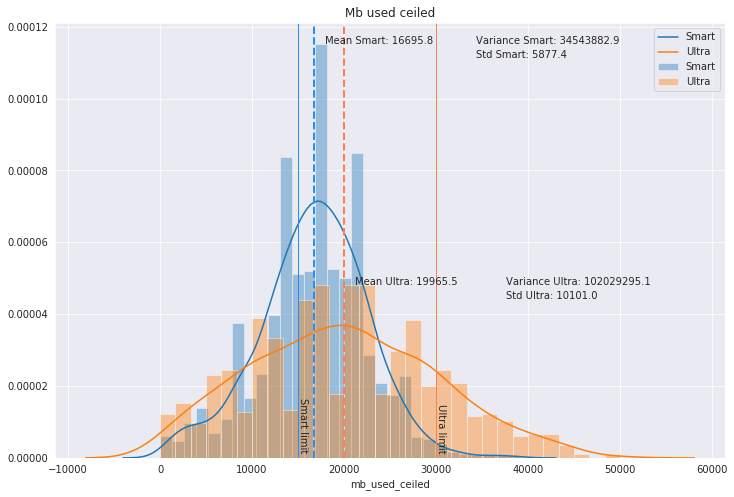

In [38]:
text_params_calls_smart = text_parameters(smart['mb_used_ceiled'],
                optimal_bins
               )
text_params_calls_ultra = text_parameters(ultra['mb_used_ceiled'],
                optimal_bins
               )
hist_plot(smart['mb_used_ceiled'],
          ultra['mb_used_ceiled'],
          mean_smart_mb_used, 
          var_smart_mb_used, 
          std_smart_mb_used,
          mean_ultra_mb_used, 
          var_ultra_mb_used, 
          std_ultra_mb_used,
          optimal_bins,
          text_params_calls_smart,
          text_params_calls_ultra,
          s_lim=15000,
          u_lim=30000,
          limits=True
         )

- Absolutely different picture of web traffic distributions;
- In average, Ultra users use 2.5 gb more of web traffic compared to Smart users;
- Standart deviation of Ultra users is almost 40% higher than for Smart users. It is probably due to the fact that Ultra users have much higher plan limitation and they feel more comfortable using web data without thinking of reaching the limitation;
- Smart user's mean higher than the limitation so majority of them pay above the plan. For Ultra users the situation is different: the limitation is shifted towards Q3 but hte mean is around the median so these users mainly pay just for the plan;

### Conclusion

- Ultra users do not use all the plan for call minutes and messages and do not pay above the plan for these communication types;
- Almost half of Smart users pays above the plan for all the communication types;
- Web traffic is popular for users of both plans and majority of Smart users use it above the plan and pay more than just monthly subscription fee;

## Hypothesis testing

- Now lets analyse revenue distributions for both plans and additionally for different regions;
- Lets first test the following hypothesis:
    1. Mean revenue of users of Smart and Ultra plans is different;
    2. Mean revenue of users from Moscow differs from mean revenue of users from other regions;

- Test first one: mean revenue of users of Smart and Ultra plans is different;
    - Null hypothesis H0: mean revenue of Ultra users **is equal** to mean revenue of Smart users;
    - Alternative hypthesis H1: mean revenue of Ultra users **is not equal** to mean revenue of Smart users;
- It needs to check means of two samples (revenues of both plans), hence it needs to be understood if means of two populations, from which those two samples were collected, are equal (in other words, if those two samples **belong to the same popuation** ~ sample means difference is around 0 - H0) or not (in other words, if those two samples **do not belong to the same popuation** ~ sample means difference significaly deviates from 0 - H1);
- Hence t-test for testing equality of two population means is a good choice;
- There is no information about equality of two populations variances, so we set equal_var equals False;

In [39]:
alpha = .05
results = st.ttest_ind(smart['revenue'], ultra['revenue'], equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Reject hull hypothesis')
else:
    print('Cannot reject null hypothesis') 

p-value: 5.742823009738983e-251
Reject hull hypothesis


- There is statistically significant result! Null hypothesis is rejected, so alternative hypothesis is accepted: mean revenue of Ultra users is **not equal** to mean revenue of Smart users;
- Lets additionally visualize revenue distribution and look at their means, variances and standart deviations;

In [40]:
# smart
mean_smart_revenue = smart['revenue'].mean()
var_smart_revenue = smart['revenue'].var()
std_smart_revenue = np.sqrt(var_smart_revenue)

# ultra
mean_ultra_revenue = ultra['revenue'].mean()
var_ultra_revenue = ultra['revenue'].var()
std_ultra_revenue = np.sqrt(var_ultra_revenue)

In [41]:
print('Total number of revenue values in ultra:', ultra['revenue'].shape[0])
ultra['revenue'].value_counts()
print('Fraction of values equal to 1950: {:.1%}'.format(ultra['revenue'].value_counts().iloc[0]/ultra['revenue'].shape[0]))

Total number of revenue values in ultra: 985
Fraction of values equal to 1950: 85.0%


- 85% of Ultra users do not pay above the plan;
- In order to see revenue distribution of Ultra users without that huge peak lets plot only users with revenue higher than 2000 rubles and set lower number of bins;

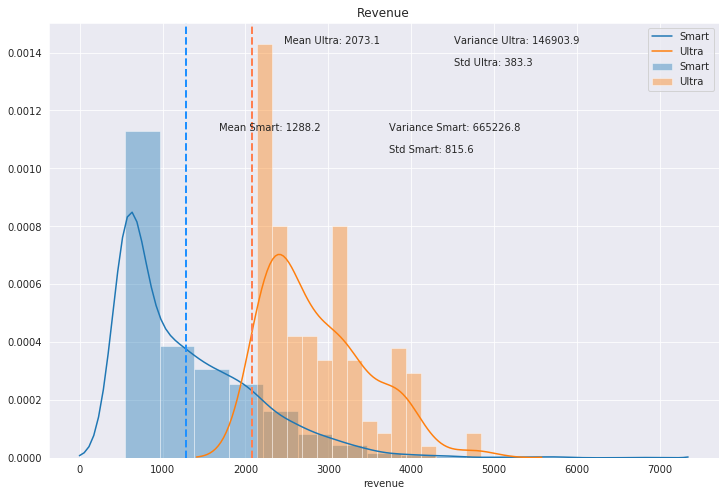

In [42]:
text_params_revenue_smart = text_parameters(smart['revenue'],
                15
               )
text_params_revenue_ultra = text_parameters(ultra[ultra['revenue'] > 2000]['revenue'],
                15
               )
hist_plot(smart['revenue'],
          ultra[ultra['revenue'] > 2000]['revenue'],
          mean_smart_revenue, 
          var_smart_revenue, 
          std_smart_revenue,
          mean_ultra_revenue, 
          var_ultra_revenue, 
          std_ultra_revenue,
          15,
          text_params_revenue_smart,
          text_params_revenue_ultra
         )

- **Ultra plan gives  60% more revenue per user** compared to Smart plan;
- It is clear shown how distributions are shifted against each other;
- Now lets make boxplot and pointplot;

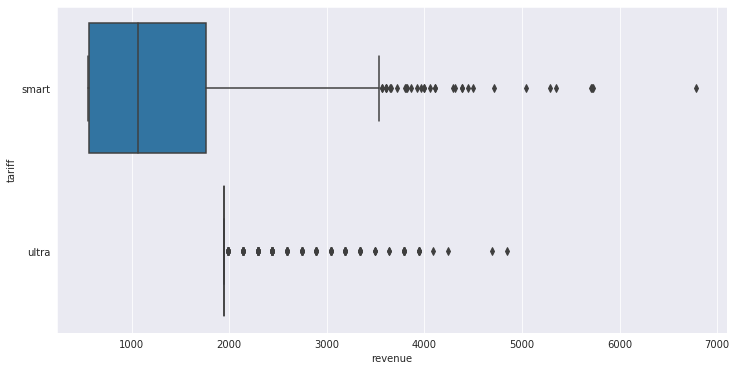

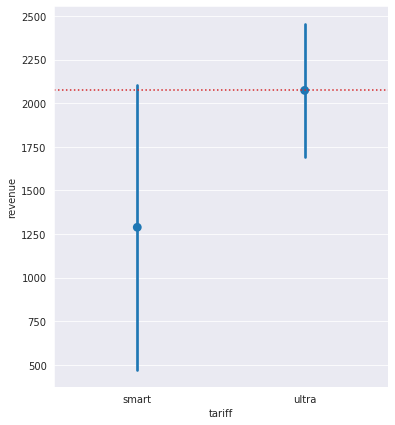

In [43]:
fig, ax = plt.subplots(figsize=(12, 6))
fig_1, ax_1 = plt.subplots(figsize=(6, 7))

smart_ultra_revenues_concat = pd.concat([smart[['revenue', 'tariff']], ultra[['revenue', 'tariff']]])

sns.boxplot(x='revenue', 
            y='tariff', 
            data=smart_ultra_revenues_concat,
            ax=ax
           )
sns.pointplot(x='tariff', 
              y='revenue', 
              data=smart_ultra_revenues_concat,
              ax=ax_1,
              join=False,
              ci='sd'
             )
plt.axhline(mean_ultra_revenue, linestyle=':', color='tab:red')
plt.show()

In [44]:
user_data_monthly.pivot_table(index='tariff', values='revenue', aggfunc=['sum', 'mean'])

,sum,mean
,revenue,revenue
tariff,,
smart,2871286.94,1288.15
ultra,2042016.00,2073.11


- Revenue values of Ultra plan are concentrated around 2000 rubles in the boxplot;
- Besides in pointplot it is shown that Ultra revenue mean touches just the margin of confidence interval of Smart revenue mean, which is another proof for having low p-value;
- Looking at revenue sums Smart plan brings around 30% more revenue compared to Ultra plan;
- But it is important to note that number of Smart users is more than 2 times higher that number of Ultra users;
- Hence per user **Ultra plan is more profitable** in terms of revenue;
- Thus, in order to increase revenue **first** it needs to **provide higher advertising budget** to higher revenue generationg **Ultra plan** in order to attract more clients, becaues of according to the samples the number of Ultra users is 2 times lower than number of Smart users, **second** it is probably worth to think about **Ultra plan conditions re-development** in the way of decreasing of plan limitations for number of free minutes and messages to have higher probability of getting additional revenue above the plan;

- Now lets test the second hypothesis: mean revenue of users from Moscow differs from mean revenue of users from other regions;
    - Null hypothesis H0: mean revenue of users from Moscow **is equal** to the mean revenue of users from other regions;
    - Алтернативная гипотеза H1: mean revenue of users from Moscow **is not equal** to the mean revenue of users from other regions;
- It needs to check means of two samples (revenues of two regions), hence t-test for testing equality of two population means is a good choice;
- There is no information about equality of two populations variances, so we set equal_var equals False;

In [45]:
# create two tables: revenue of Moscow region and revenue of other regions
user_data_monthly_city = user_data_monthly.merge(users[['user_id', 'city']], on='user_id')
display(user_data_monthly_city.loc[user_data_monthly_city['city'] == 'Москва', 'revenue'].count())
display(user_data_monthly_city.loc[user_data_monthly_city['city'] != 'Москва', 'revenue'].count())

user_moscow = user_data_monthly_city.loc[user_data_monthly_city['city'] == 'Москва', ['revenue', 'city']]
user_other = user_data_monthly_city.loc[user_data_monthly_city['city'] != 'Москва', ['revenue', 'city']]

display(user_moscow.shape[0])
user_other.shape[0]

611

2603

611

2603

In [46]:
results_regions = st.ttest_ind(user_moscow['revenue'], user_other['revenue'], equal_var=False)

print('p-value:', results_regions.pvalue)

if results_regions.pvalue < alpha:
    print('Reject null hypothesis')
else:
    print('Cannot reject null hypothesis') 

p-value: 0.5232321195793577
Cannot reject null hypothesis


- Here it is not possible to reject null hypothesis according to the data and the probability to get such a difference in revenues is relatively high;
- Lets additionally visualize revenue distribution and look at their means, variances and standart deviations;

In [47]:
# Moscow
mean_moscow_revenue = user_moscow['revenue'].mean()
var_moscow_revenue = user_moscow['revenue'].var()
std_moscow_revenue = np.sqrt(var_moscow_revenue)

# other regions
mean_other_revenue = user_other['revenue'].mean()
var_other_revenue = user_other['revenue'].var()
std_other_revenue = np.sqrt(var_other_revenue)

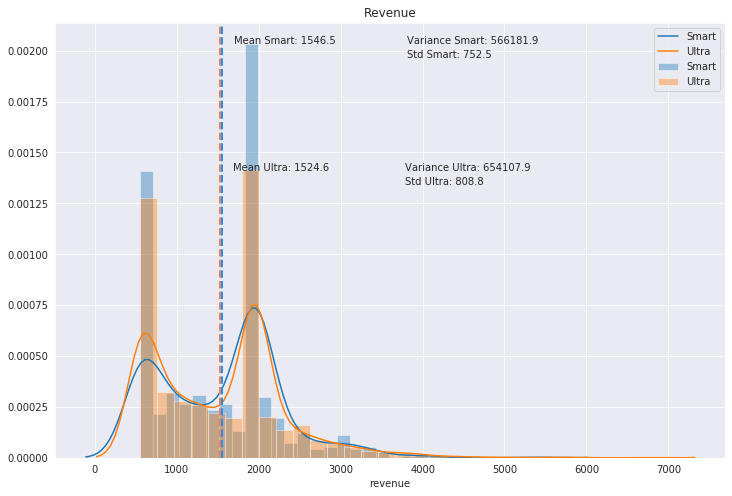

In [48]:
text_params_revenue_moscow = text_parameters(user_moscow['revenue'],
                optimal_bins
               )
text_params_revenue_other = text_parameters(user_other['revenue'],
                optimal_bins
               )
hist_plot(user_moscow['revenue'],
          user_other['revenue'],
          mean_moscow_revenue, 
          var_moscow_revenue, 
          std_moscow_revenue,
          mean_other_revenue, 
          var_other_revenue, 
          std_other_revenue,
          optimal_bins,
          text_params_revenue_moscow,
          text_params_revenue_other
         )

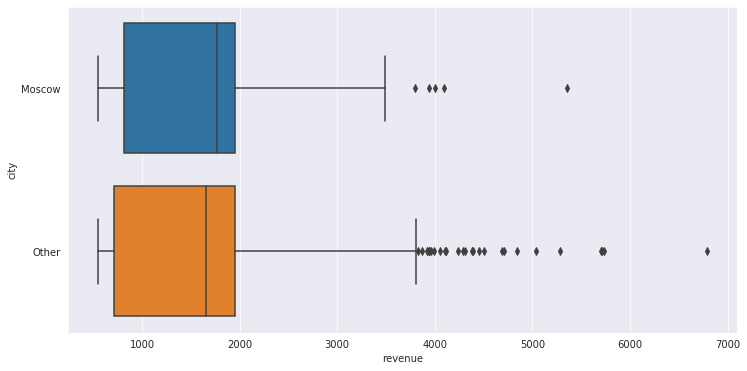

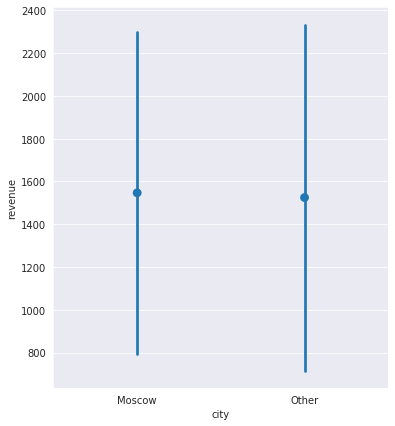

In [49]:
fig, ax = plt.subplots(figsize=(12, 6))
fig_1, ax_1 = plt.subplots(figsize=(6, 7))

moscow_other_revenues_concat = pd.concat([user_moscow, user_other])

def fill_city(value):
    if value != 'Москва':
        return 'Other'
    else:
        return 'Moscow'
    
moscow_other_revenues_concat['city'] = moscow_other_revenues_concat['city'].apply(fill_city)

sns.boxplot(x='revenue', 
            y='city', 
            data=moscow_other_revenues_concat,
            ax=ax
           )
sns.pointplot(x='city', 
              y='revenue', 
              data=moscow_other_revenues_concat,
              ax=ax_1,
              join=False,
              ci='sd'
             )

plt.show()

- As it is shown on the plots above, in 2 standard deviations two distributions are extremely similar and have two distinct peaks, the means are very close. So it is not a surprise that null hypothesis is confirmed according to the data!

### Conclusion

- Hypothesis "Mean revenue of users of Smart and Ultra plans is different" **is confirmed** according to the data;
- Hypothesis "Mean revenue of users from Moscow differs from mean revenue of users from other regions" **is not confirmed** according to the data;

## Final conclusion

1. Ultra users do not use the full free amount of minutes and messages from their plan;
2. Almost half of Smart users pays above the plan;
3. Web traffic is popular among users of both plans, but majority of Smart users pays above the plan for the web traffic;
4. Hypothesis "Mean revenue of users of Smart and Ultra plans is different" is confirmed according to the data;
5. Hypothesis "Mean revenue of users from Moscow differs from mean revenue of users from other regions" is not confirmed according to the data;
6. **Ultra plan** has **higher** revenue per user, but the number of users is 2 times lower than for Smart plan;
7. Thus, in order **to increase revenue** first **it needs to provide higher advertising budget** to higher revenue generationg **Ultra plan** in order to attract more clients, becaues of according to the samples the number of Ultra users is 2 times lower than number of Smart users, second it is probably worth **to think about Ultra plan conditions re-development** in the way of decreasing of plan limitations for number of free minutes and messages to have higher probability of getting additional revenue above the plan;